## K- Nearest Neighbours

In [442]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [443]:
dataset = load_iris()
X = dataset.data
Y = dataset.target
data = pd.DataFrame(X,columns=dataset.feature_names)
data['target'] = Y
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Text(0.5, 0, 'sepal petal')

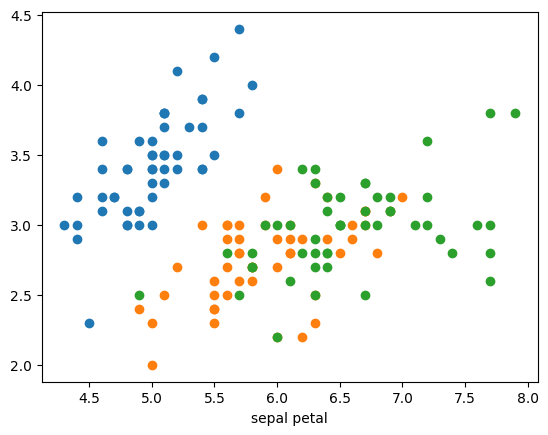

In [444]:
plt.scatter(data['sepal length (cm)'][data.target==0],data['sepal width (cm)'][data.target==0])
plt.scatter(data['sepal length (cm)'][data.target==1],data['sepal width (cm)'][data.target==1])
plt.scatter(data['sepal length (cm)'][data.target==2],data['sepal width (cm)'][data.target==2])
plt.xlabel('sepal length')
plt.xlabel('sepal petal')

Text(0.5, 0, 'petal petal')

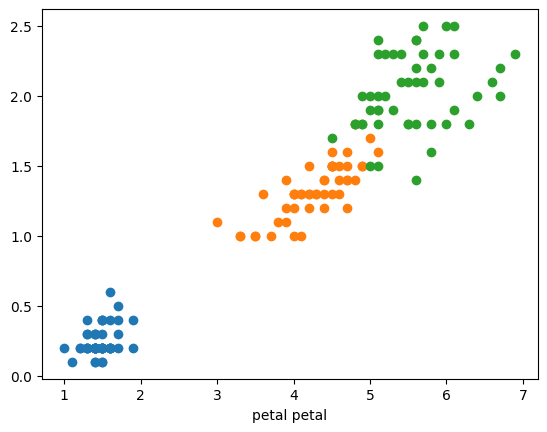

In [445]:
plt.scatter(data['petal length (cm)'][data.target==0],data['petal width (cm)'][data.target==0])
plt.scatter(data['petal length (cm)'][data.target==1],data['petal width (cm)'][data.target==1])
plt.scatter(data['petal length (cm)'][data.target==2],data['petal width (cm)'][data.target==2])
plt.xlabel('petal length')
plt.xlabel('petal petal')

In [446]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,stratify=Y,shuffle=True,random_state=10)

In [447]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10,weights='uniform')
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9777777777777777

In [448]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10,weights='distance')
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

1.0

In [449]:
clf.__dir__()

['n_neighbors',
 'radius',
 'algorithm',
 'leaf_size',
 'metric',
 'metric_params',
 'p',
 'n_jobs',
 'weights',
 'n_features_in_',
 'outputs_2d_',
 'classes_',
 '_y',
 'effective_metric_params_',
 'effective_metric_',
 '_fit_method',
 '_fit_X',
 'n_samples_fit_',
 '_tree',
 '__module__',
 '__doc__',
 '__init__',
 'fit',
 'predict',
 'predict_proba',
 '_more_tags',
 '__abstractmethods__',
 '_abc_impl',
 '_kneighbors_reduce_func',
 'kneighbors',
 'kneighbors_graph',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__',
 '_estimator_type',
 'score',
 '_check_algorithm_metric',
 '_fit',
 '_get_param_names',
 'get_params',
 'set_params',
 '__getstate__',
 '__setstate__',
 '_get_tags',
 '_check_n_features',
 '_check_fea

In [450]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'distance'}

In [451]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [1,3,5,10,50],
    'weights':['uniform','distance']
},cv=3)
clf.fit(X,Y)
result = pd.DataFrame(clf.cv_results_)
result[['param_weights','param_n_neighbors','mean_test_score']]

,param_weights,param_n_neighbors,mean_test_score
0,uniform,1,0.960000
1,distance,1,0.960000
2,uniform,3,0.973333
3,distance,3,0.973333
4,uniform,5,0.980000
5,distance,5,0.973333
6,uniform,10,0.966667
7,distance,10,0.986667
8,uniform,50,0.886667
9,distance,50,0.953333


In [452]:
clf.best_params_,clf.best_score_

({'n_neighbors': 10, 'weights': 'distance'}, 0.9866666666666667)